In [86]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_dataset, test_dataset = mnist.load_data()
def preprocess(dataset):
    xs, ys = dataset
    xs = np.expand_dims(xs, axis=3)
    ys = to_categorical(ys, 10)
    return xs, ys
xs_train, ys_train = preprocess(train_dataset)
xs_test, ys_test = preprocess(test_dataset)


In [130]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(8, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(4, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(49))
model.add(Reshape((7,7,1)))
model.add(Conv2DTranspose(4, kernel_size=(3,3), padding='same', strides=(2,2),  activation='relu'))
model.add(Conv2DTranspose(1, kernel_size=(3,3), padding='same', strides=(2,2),  activation='relu'))
# model.add(Conv2DTranspose(1, kernel_size=(3,3), padding='same', strides=(2,2),  activation='relu'))

model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 24, 24, 8)         1160      
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 22, 22, 4)         292       
_________________________________________________________________
flatten_19 (Flatten)         (None, 1936)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 49)                94913     
_________________________________________________________________
reshape_17 (Reshape)         (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_transpose_74 (Conv2DT (None, 14, 14, 4)         40        
__________

In [ ]:
model.fit(xs_train, xs_train)

Epoch 1/1
  640/60000 [..............................] - ETA: 47s - loss: 2109.2268 - acc: 0.6827

In [108]:
model.evaluate(xs_test, xs_test)

10000/10000 [==============================] - 2s 186us/step


[1286.5920376953125, 0.7405632645606994]

In [122]:
def visualize(img):
    fig = plt.figure(figsize=(8, 8))
    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    img = np.expand_dims(img, axis=3)
    predicted_img = model.predict(np.array([img]))[0]
    predicted_img = np.squeeze(predicted_img)
    fig.add_subplot(1,2,2)
    plt.imshow(predicted_img, cmap='gray')

4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


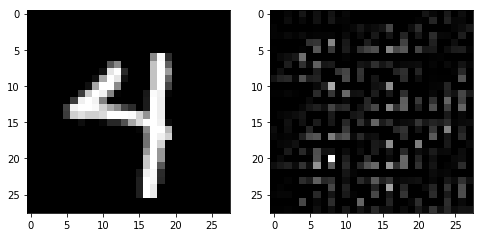

In [133]:
xs, ys = xs_test, ys_test
index = np.random.randint(0,len(xs))
img = np.squeeze(xs[index])
print(np.argmax(ys[index]))
visualize(img)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


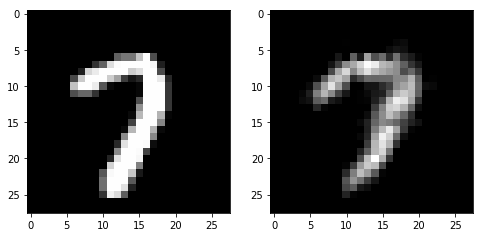

In [147]:
img = np.squeeze(xs[2234])
visualize(img)

True